# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

# <h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [5]:
import scipy.stats as stats
import statsmodels.stats as smd
import pylab




# Q1 

In [6]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [7]:
df.head()


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [8]:
df.shape[0]


130

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns



In [11]:
sns.set()

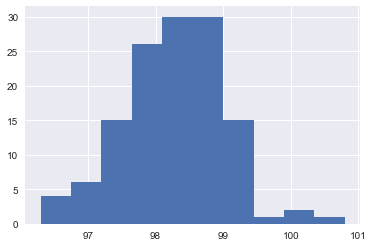

In [12]:
_=plt.hist(df['temperature'])

## From visual inspection it is not a normal distribution.


In [13]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

# Using ECDF

In [14]:
df2=df['temperature']


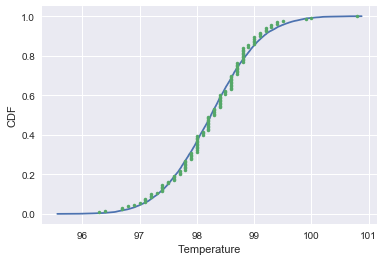

In [15]:
import numpy as np
from numpy import random



mean = np.mean(df2)
std = np.std(df2)
samples = np.random.normal(mean , std, size = 10000)

def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y
x_theor , y_theor= ecdf(samples)
x , y = ecdf(df2)

_=plt.plot(x_theor , y_theor )
_=plt.plot(x , y , marker = '.' , linestyle = 'none' )
_=plt.xlabel( 'Temperature')
_=plt.ylabel('CDF')
plt.show()




As we can see from ecdf the distribution is not normal as the actual ecdf and theorotical ecdf do not merge at all points.



## Q2

Yes the sample is large and independent as n >30.


##  Q3



In [18]:
# Bootstrap Hypothesis test

def bootstrap_replicate(data , func):
    return func(np.random.choice(data,size = len(data)))

def draw_bootstrap_rep(data , func , size = 1):
    bs_replicates=np.empty(size)
    for i in range(size):
        bs_replicates[i]=bootstrap_replicate(data ,func)
    return bs_replicates
translated_temp = df2 -np.mean(df2)+ 98.6
bs_replicate = draw_bootstrap_rep(translated_temp , np.mean , 10000)
p=np.sum(bs_replicate <= np.mean(df2))/10000
print(p)

0.0


 As the value of p is 0 , it suggests that the null hypothesis that mean temp is 98.6 F is false.

-I will use a one sample test as  it counts the number of standard errors that seperate the sample mean from hypothesis.

-I will use z stastic as n>30 .


- For n>30 , both z and t statistics give the same results so no difference.


In [19]:
# Frequentist Stastical Testing



t_stat = stats.ttest_1samp(df2, 98.6)
print('t-score: {}\np-value: {}'.format(round(t_stat.statistic, 5), round(t_stat.pvalue, 5)))



t-score: -5.45482
p-value: 0.0


## Q4

when sample size is 10 we use t test. 

 Z score is used when we have a normal distribution and n>30 while t score is used when n<30 and unknown population standard deviation.

## Q5


In [21]:
mean_1 = np.mean(df2)
std_1 = np.std(df2)
print('sample mean: {:0.4}\nsample standard deviation: {:0.4}\n'.format(mean_1, std_1))

sample mean: 98.25
sample standard deviation: 0.7304



In [29]:
#Using bootstrap analysis


bootstrap_replicates = np.empty(10000)

size = len(bootstrap_replicates)

for i in range(size):
    bootstrap_sample = np.random.choice(df2, size=len(df2))
    bootstrap_replicates[i] = np.mean(bootstrap_sample)

p = np.sum(bootstrap_replicates >= 98.6) / len(bootstrap_replicates)
print('p-value: {}'.format(p))

mean_2 = np.mean(bootstrap_replicates)
confidence_interval = stats.norm.interval(0.95, loc=mean_2 )

print('95% confidence interval: {:0.5} - {:0.5}'.format(confidence_interval[0], confidence_interval[1]))
print('margin of error: +/-{:0.5}\n\n'.format((confidence_interval[1] - mean_2)))


p-value: 0.0
95% confidence interval: 96.289 - 100.21
margin of error: +/-1.96




In [35]:
# Frequentist Approach
#alpha = 0.05, confidence coefficient = 95%


ci_l, ci_h = stats.norm.interval(0.95, loc=mean_2)
print('95% confidence interval: {:0.5} - {:0.5}'.format(ci_l, ci_h))

# margin of error 
print('margin of error: +/-{:0.5}'.format((ci_h - mean_2))) 


95% confidence interval: 96.289 - 100.21
margin of error: +/-1.96


Using mean(98.249°), and at a 95% confidence interval, a temperature below 96.289 or above 100.21° isabnormal. 

# Q6

We will use hypothesis testing.


Null Hypothesis = there is no difference between temperature for males and females


Alternative Hypothesis = There is  significant difference in temperature for males and females


In [36]:
males = df[df.gender == 'M']
females = df[df.gender == 'F']


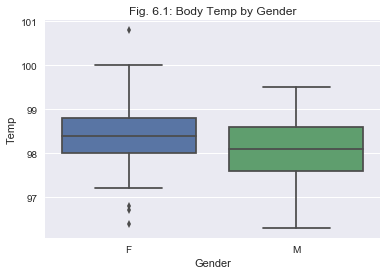

In [37]:
sns.boxplot(x = 'gender', y = 'temperature', data=df)

sns.set()

_ = plt.xlabel('Gender')
_ = plt.ylabel('Temp')
_ = plt.title('Fig. 6.1: Body Temp by Gender')

plt.show()

In [38]:
t_m = males.temperature
t_f = females.temperature


mv = np.var(t_m)
fv = np.var(t_f)

print('Male variance: {}\nFemale variance: {}'.format(mv, fv))



Male variance: 0.4807479289940825
Female variance: 0.5442698224852062


In [39]:
 
size = 10000
bs_replicates_m = np.empty(size)

for i in range(size):
    bs_sample_m = np.random.choice(t_m, len(t_m))
    bs_replicates_m[i] = np.mean(bs_sample_m)
    
bs_mean_m = np.sum(bs_replicates_m)/size

bs_replicates_f = np.empty(size)

for i in range(size):
    bs_sample_f = np.random.choice(t_f, len(t_f))
    bs_replicates_f[i] = np.mean(bs_sample_f)

bs_mean_f = np.sum(bs_replicates_f)/size


result = stats.ttest_ind(bs_replicates_f, bs_replicates_m, equal_var=False)

print('Welch\'s t-test:\nt-statistic: {:0.5}\np-value: {:0.5}'.format(result[0], result[1]))

Welch's t-test:
t-statistic: 229.87
p-value: 0.0


since p-value is 0 we reject the null hypothesis.


# Summary

The mean body temperature = 98.6 F is false.
The boxplot above shows that females' mean body temperature is higher than males' .
The bootstrap test above shows that male body temperature is not equal to mean female body temperature.